In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['Total_spent'] = df["TV"] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,Total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_spent', ylabel='sales'>

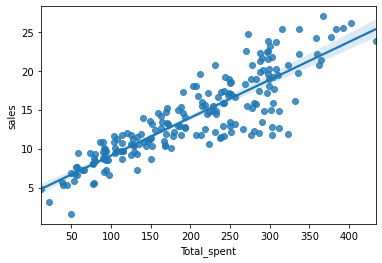

In [7]:
sns.regplot(data=df, x='Total_spent', y='sales')

In [8]:
X = df['Total_spent']
y = df['sales']

In [9]:
np.polyfit(X,y, deg=1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0,500,100)

In [10]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

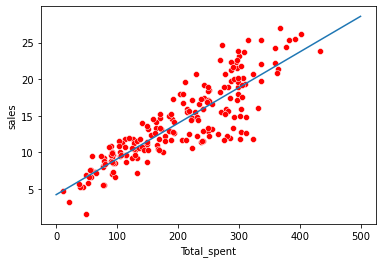

In [11]:
sns.scatterplot(data=df,x='Total_spent', y='sales', color='red')
plt.plot(potential_spend, predicted_sales)

In [12]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales

13.98060422

In [ ]:
# Supervised Machine Learning (LR)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
X = df.drop('sales', axis=1)
y = df['sales']

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
mymodel = LinearRegression()

In [20]:
mymodel.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = mymodel.predict(X_test)

In [22]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

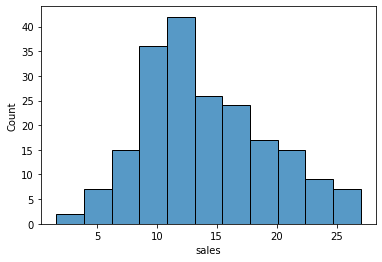

In [25]:
sns.histplot(data=df, x='sales')

In [26]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [27]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [28]:
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

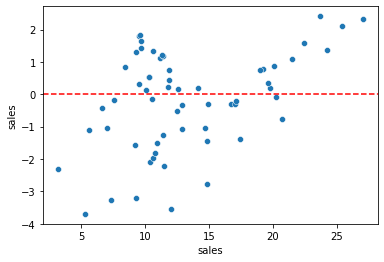

In [30]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

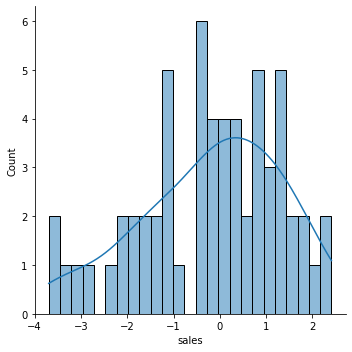

In [33]:
sns.displot(test_residuals, bins=25, kde=True)

In [34]:
final_model  = LinearRegression()

In [35]:
final_model.fit(X,y)

LinearRegression()

In [36]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
from joblib import dump,load

In [38]:
dump(final_model, 'Final_sales.joblib')

['Final_sales.joblib']

In [39]:
loaded = load('Final_sales.joblib')

In [40]:
loaded.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [41]:
X.shape

(200, 3)

In [42]:
campaign = [[149,22,12]]

In [44]:
loaded.predict(campaign)

array([13.893032])